# Image Retrieval Performance Evaluation Notebook

__Author:__ Vibhor Jain

__Description:__ This Notebook is dedicated for Image Retrieval performance evaluation across different embeddings and distance metrics used in this research

__Dated:__ 21st Mar 2020

__Version:__ 1.0



<img src="flowchart.png">

In [1]:
# ignoring all deprecated related warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import logging

# disabling all tensorflow related logs
logging.getLogger('tensorflow').disabled = True

In [2]:
# importing all internal utilities required
from utils.sim_measures import SimMeasures
from utils.embeddings import Embeddings
from utils.image_retrieval import ImageRetrieval
from utils.file_helper import load_query_to_img
from utils.display_helper import display_stats

In [3]:
# loading query to images mapping file
query_to_img = load_query_to_img()
query_to_img.head(2)

,query,img_name
0,soiled color pony in the field,"[78,152,161,67]"
1,pic of food on the table,"[135,1,12,186,9]"


In [4]:
# initializing image retrieval object for Universal Sentence Encoder embedding.
ir_use = ImageRetrieval(Embeddings.USE)

# predicting images using USE embedding and COSINE distance metrics.
y_true, y_pred = ir_use.predict_img_indices(query_to_img, SimMeasures.COSINE)

# generating per query recall list using the actual and predicted image lists.
recall_use, image_count_use = ir_use.get_recall_list(y_true, y_pred)

# multiplying recall for each query with number of images involved.
# Say a query had a recall of 0.75 and 4 relevant images were expected, 
# that means, 3 out of 4 relevant images were retrieved. This way, 
# we'll get the overall relevant images retrieved for all queries.
prod_use = [a*b for a,b in zip(recall_use,image_count_use)]

# getting the total and relevant images expected for all queries.
total_images_use = np.sum(image_count_use)
total_relevant_images_retrieved_use = np.sum(prod_use)

# printing all the metadata
display_stats("USE embeddings with Cosine Distance metrics", total_images_use, total_relevant_images_retrieved_use)


USE embeddings with Cosine Distance metrics
------------------------------------------------

+-----------------------+---------------------------+----------------+
| Total relevant images | Relevant images retrieved | Average Recall |
+-----------------------+---------------------------+----------------+
|          106          |            86.0           |      0.81      |
+-----------------------+---------------------------+----------------+


In [5]:
# initializing image retrieval object for Universal Sentence Encoder embedding.
ir_infersent = ImageRetrieval(Embeddings.INFERSENT)

# predicting images using INFERSENT embedding and FAISS distance metrics.
y_true, y_pred = ir_infersent.predict_img_indices(query_to_img, SimMeasures.FAISS)

# generating per query recall list using the actual and predicted image lists.
recall_infersent, image_count_infersent = ir_infersent.get_recall_list(y_true, y_pred)

# multiplying recall for each query with number of images involved.
prod_infersent = [a*b for a,b in zip(recall_infersent,image_count_infersent)]

# getting the total and relevant images expected for all queries.
total_images_infersent = np.sum(image_count_infersent)
total_relevant_images_retrieved_faiss = np.sum(prod_infersent)

# printing all the metadata
display_stats("InferSent embeddings with FAISS metrics", total_images_infersent, total_relevant_images_retrieved_faiss)


Vocab size : 100000
InferSent embeddings with FAISS metrics
------------------------------------------------

+-----------------------+---------------------------+----------------+
| Total relevant images | Relevant images retrieved | Average Recall |
+-----------------------+---------------------------+----------------+
|          106          |            66.0           |      0.62      |
+-----------------------+---------------------------+----------------+


In [6]:

# predicting images using INFERSENT embedding and COSINE distance metrics.
y_true, y_pred = ir_infersent.predict_img_indices(query_to_img, SimMeasures.COSINE)

# generating per query recall list using the actual and predicted image lists.
recall_infersent, image_count_infersent = ir_infersent.get_recall_list(y_true, y_pred)

# multiplying recall for each query with number of images involved.
prod_infersent = [a*b for a,b in zip(recall_infersent,image_count_infersent)]

# getting the total and relevant images expected for all queries.
total_images_infersent = np.sum(image_count_infersent)
total_relevant_images_retrieved_infersent = np.sum(prod_infersent)

# printing all the metadata
display_stats("InferSent embeddings with Cosine Distance metrics", total_images_infersent, total_relevant_images_retrieved_infersent)


InferSent embeddings with Cosine Distance metrics
------------------------------------------------

+-----------------------+---------------------------+----------------+
| Total relevant images | Relevant images retrieved | Average Recall |
+-----------------------+---------------------------+----------------+
|          106          |            75.0           |      0.71      |
+-----------------------+---------------------------+----------------+


# Overall Comparison

In [7]:

display_stats("USE embeddings with Cosine Distance metrics", total_images_use, total_relevant_images_retrieved_use)


display_stats("InferSent embeddings with FAISS metrics", total_images_infersent, total_relevant_images_retrieved_faiss)


display_stats("InferSent embeddings with Cosine Distance metrics", total_images_infersent, total_relevant_images_retrieved_infersent)


USE embeddings with Cosine Distance metrics
------------------------------------------------

+-----------------------+---------------------------+----------------+
| Total relevant images | Relevant images retrieved | Average Recall |
+-----------------------+---------------------------+----------------+
|          106          |            86.0           |      0.81      |
+-----------------------+---------------------------+----------------+
InferSent embeddings with FAISS metrics
------------------------------------------------

+-----------------------+---------------------------+----------------+
| Total relevant images | Relevant images retrieved | Average Recall |
+-----------------------+---------------------------+----------------+
|          106          |            66.0           |      0.62      |
+-----------------------+---------------------------+----------------+
InferSent embeddings with Cosine Distance metrics
------------------------------------------------

+-----

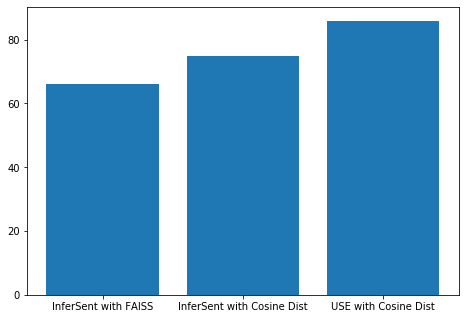

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
pipelines = ['InferSent with FAISS', 'InferSent with Cosine Dist', 'USE with Cosine Dist']
recall = [total_relevant_images_retrieved_faiss, total_relevant_images_retrieved_infersent, total_relevant_images_retrieved_use]
ax.bar(pipelines,recall)
plt.show()